Let's start by importing our essential libraries first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Since the file 'tagged_selections_by_sentence.csv' contains our required 'greeting' column, let's use this csv initially to assess our data.

In [254]:
# Opening our .csv file
df= pd.read_csv('D:/Challenge/rsics_dataset/tagged_selections_by_sentence.csv')
df

,Dataset,Partition,SentenceID,Threshold,MergedSelections,Unselected,Selected,Greeting,Backstory,Justification,Rant,Gratitude,Other,Express Emotion
0,1,1,2227,2,[Just to set the scene... I have a fairly tall...,"if we check in online, will this mean we auto...",Just to set the scene... I have a fairly tall ...,0,1,0,0,0,1,0
1,1,1,2182,2,I am flying from Luton to Dalaman (Turkey) nex...,I am flying from Luton to Dalaman (Turkey) nex...,"We already have allocated seats, so as far as ...",0,1,0,0,0,1,0
2,1,1,2191,2,BA has won their case in the High Court attack...,BA has won their case in the High Court attack...,NaN,0,0,0,0,0,0,0
3,1,1,2183,2,[My family is flying from Hartford Ct to Honol...,does anyone know if we are allowed to take ou...,My family is flying from Hartford Ct to Honolu...,0,1,0,0,0,0,0
4,1,1,2198,2,I have been advised that the best seating is i...,I have been advised that the best seating is i...,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,4,2,10337,2,how can get my new credit card shipped to a di...,how can get my new credit card shipped to a di...,NaN,0,0,0,0,0,0,0
6755,4,2,10361,2,with the silver option can the service e suspe...,with the silver option can the service e suspe...,when we are out f the area?,0,0,0,0,0,1,0
6756,4,2,10362,2,you all has everything in your displaying acce...,you all has everything in your displaying acce...,because I do't understand how.,0,0,0,0,0,1,0
6757,4,2,10340,2,How can i upgrade my tv package to include the...,How can i upgrade my tv package to include the...,NaN,0,0,0,0,0,0,0


Let's check if any of our columns have null values

In [4]:
df.isna().sum()

Dataset                0
Partition              0
SentenceID             0
Threshold              0
MergedSelections       0
Unselected            34
Selected            2969
Greeting               0
Backstory              0
Justification          0
Rant                   0
Gratitude              0
Other                  0
Express Emotion        0
dtype: int64

As we can see that the columns 'Unselected' and 'Selected' have null values. Let's explore them to see if we can fill them up.

In [74]:
df.loc[df['Unselected'].isna() & df['Greeting']== 1]

,Dataset,Partition,SentenceID,Threshold,MergedSelections,Unselected,Selected,Greeting,Backstory,Justification,Rant,Gratitude,Other,Express Emotion
67,1,1,2271,2,"[Hi, As information for any US passport holder...",NaN,"Hi, As information for any US passport holder ...",1,1,0,0,1,0,0
947,1,2,6873,2,"[Hi, I'm wondering if it is possible to change...",NaN,"Hi, I'm wondering if it is possible to change ...",1,1,0,0,1,1,0
4874,3,2,9246,2,"[Hello, I don't travel with cname- that often ...",NaN,"Hello, I don't travel with cname- that often t...",1,1,0,0,0,0,0


As we can see that the the rows which have greetings also have some null values so instead of dropping them we can fill them up with 0 so that we can retain them to build up the model.

In [138]:
df= df.fillna('0')

In [139]:
df.isna().sum()

Dataset             0
Partition           0
SentenceID          0
Threshold           0
MergedSelections    0
Unselected          0
Selected            0
Greeting            0
Backstory           0
Justification       0
Rant                0
Gratitude           0
Other               0
Express Emotion     0
dtype: int64

In [141]:
df['Greeting'].value_counts()

0    5957
1     802
Name: Greeting, dtype: int64

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [144]:
df['Selected'].dtype

dtype('O')

We can vectorize the column 'Selected' and check how it looks before building our model.

In [145]:
bagofwords= CountVectorizer(lowercase= False)
bagofwords.fit(df['Selected'])
tf= bagofwords.transform(df['Selected'])
tf 
tf.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [146]:
bagofwords.get_feature_names()

['00',
 '000',
 '001',
 '00h',
 '01',
 '0119',
 '01OCT14',
 '01p',
 '02',
 '03',
 '03th',
 '04',
 '0472',
 '05',
 '05pm',
 '06',
 '0600',
 '07',
 '070',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '100119',
 '1003',
 '100K',
 '100ml',
 '101',
 '1020',
 '1040',
 '1042',
 '105',
 '1064820598',
 '10AM',
 '10am',
 '10hr',
 '10hrs',
 '10inches',
 '10kg',
 '10mins',
 '10p',
 '10th',
 '11',
 '110',
 '1100',
 '111',
 '118',
 '11KG',
 '11am',
 '11th',
 '12',
 '120',
 '1200',
 '1215',
 '1263931610',
 '12JUN14',
 '12K',
 '12mo',
 '12pm',
 '12yo',
 '12yr',
 '13',
 '130',
 '1300',
 '133',
 '1372',
 '1390689674',
 '13th',
 '14',
 '1400',
 '1411',
 '142',
 '1420JFK',
 '145',
 '14700',
 '14MAY14',
 '15',
 '150',
 '1500',
 '155',
 '158',
 '15am',
 '15kg',
 '15th',
 '16',
 '160',
 '1650',
 '16th',
 '17',
 '170',
 '1720KBP',
 '175',
 '176',
 '1795',
 '17am',
 '17th',
 '18',
 '180',
 '1833',
 '189',
 '18pm',
 '18th',
 '19',
 '190',
 '1980',
 '1995',
 '19th',
 '1E',
 '1F',
 '1K',
 '1hr',
 '1pm',
 '1st',
 '20',


In [148]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [147]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=tf.toarray())
display(my_df)

,00,000,001,00h,01,0119,01OCT14,01p,02,03,...,yuo,zapped,zero,zip,zipcode,zipped,zipper,zips,zone,é400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
my_df

,00,000,001,00h,01,0119,01OCT14,01p,02,03,...,yuo,zapped,zero,zip,zipcode,zipped,zipper,zips,zone,é400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since our model basically can work off the 'Selected' column which has our greeting, let's train the model based on it and make our 'Greeting' column our target variable.

In [150]:
X= df['Selected']
y= df['Greeting']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [152]:
X_train.shape

(4528,)

In [153]:
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train = bagofwords.transform(X_train)
X_train

<4528x5662 sparse matrix of type '<class 'numpy.int64'>'
	with 42934 stored elements in Compressed Sparse Row format>

In [154]:
X_test = bagofwords.transform(X_test)
X_test

<2231x5662 sparse matrix of type '<class 'numpy.int64'>'
	with 21686 stored elements in Compressed Sparse Row format>

In [156]:
# Fitting a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)

0.9922703180212014

In [157]:
logreg.score(X_test, y_test)

0.9887942626624832

For starters with our logistic regression model we get a pretty high score of 98%

In [163]:
X_test

<2231x5662 sparse matrix of type '<class 'numpy.int64'>'
	with 21686 stored elements in Compressed Sparse Row format>

Let's define a function to get all our basic models result at once:

In [158]:
# import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


def eval_models(X_train, X_test, y_train, y_test):
    '''Eval different models on the provided data sets.'''
    
    # initialize the models in a list/dict
    model_dict = {"LogisticRegression": LogisticRegression(),
                 "DecisionTree": DecisionTreeClassifier(max_depth=20),
                 "KNN": KNeighborsClassifier(),
                 "SVC": LinearSVC()
                 }
    
    # dataframe for results
    result_df = pd.DataFrame(index=model_dict.keys(), 
                             columns=["train_acc", "test_acc"])
    
    # loop through the models
    for model_name, model in model_dict.items():
        # train
        model.fit(X_train, y_train)
        
        # score on train set
        result_df.loc[model_name, "train_acc"] = model.score(X_train, y_train)

        # score on test set
        result_df.loc[model_name, "test_acc"] = model.score(X_test, y_test)

    return result_df

In [159]:
result_df = eval_models(X_train, X_test, y_train, y_test)
result_df

,train_acc,test_acc
LogisticRegression,0.99227,0.988794
DecisionTree,0.995362,0.989242
KNN,0.965548,0.953832
SVC,0.995804,0.987001


As we get the best score on the basic logistic regression model itself, we can choose that to be our model. Let's get more insights from other models too in terms of metrics and efficiency.

In [252]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def report(X_train, X_test, y_train, y_test):
    '''Eval different models on the provided data sets.'''
    
    # initialize the models in a list/dict
    model_dict = {"LogisticRegression": LogisticRegression(),
                 "DecisionTree": DecisionTreeClassifier(max_depth=20),
                 "KNN": KNeighborsClassifier(),
                 "SVC": LinearSVC()
                 }
    
    
    # loop through the models
    for model_name, model in model_dict.items():
        
        print(f'For the model {model_name}: ')
        
        # train
        model.fit(X_train, y_train)
        
        # score on train set
        model.score(X_train, y_train)
        
        y_pred= model.predict(X_test)
    
        ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
        
        print(classification_report(y_test, y_pred))
              

For the model LogisticRegression: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1951
           1       1.00      0.91      0.95       280

    accuracy                           0.99      2231
   macro avg       0.99      0.96      0.97      2231
weighted avg       0.99      0.99      0.99      2231

For the model DecisionTree: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1951
           1       0.99      0.94      0.96       280

    accuracy                           0.99      2231
   macro avg       0.99      0.97      0.98      2231
weighted avg       0.99      0.99      0.99      2231

For the model KNN: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1951
           1       1.00      0.63      0.77       280

    accuracy                           0.95      2231
   macro avg       0.97      0.82      0.87 

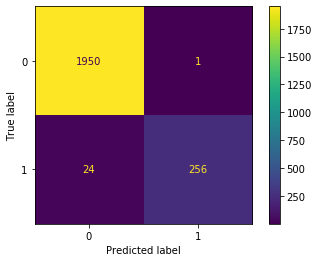

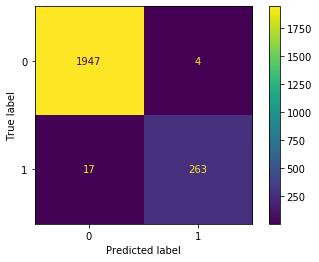

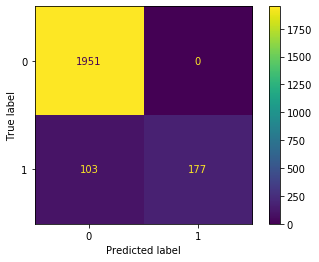

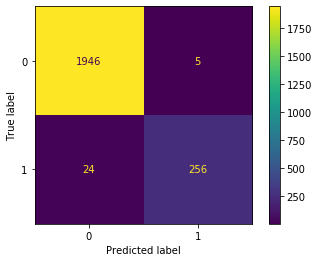

In [253]:
report(X_train, X_test, y_train, y_test)

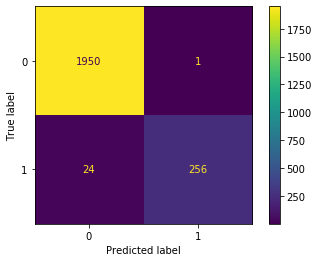

In [216]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [174]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
word_counts

array([24,  6,  1, ..., 12,  1,  1], dtype=int64)

In [175]:
words = np.array(bagofwords.get_feature_names())
words

array(['00', '000', '001', ..., 'zurich', 'zurichplan', 'é400'],
      dtype='<U21')

In [176]:
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})

words_df.sort_values(by="count", ascending=False).head(10)

,word,count
5014,the,2161
5099,to,2091
538,and,1415
2626,in,825
3366,my,819
3546,on,757
2746,is,747
2193,for,722
2763,it,712
2426,have,680


In [177]:
coefficients = logreg.coef_
coefficients

array([[-1.01064628e-01, -2.13442264e-02, -1.39525083e-04, ...,
        -5.67635277e-02, -2.25937275e-05, -9.94068360e-05]])

In [178]:
indices = coefficients.argsort()[0]

In [180]:
np.array(bagofwords.get_feature_names())[indices[:20]]

array(['full', 'travelling', 'not', 'heard', 'london', 'stories',
       'horror', 'seen', 'whilst', 'member', 'few', 'unplugged', 'main',
       'system', 'rebooted', 'still', 'flying', 'plan', 'working', 'rome'],
      dtype='<U21')

In [184]:
np.array(bagofwords.get_feature_names())[indices[-60:]]

array(['india', 'perth', '1k', 'or', 'being', 'europe', 'packet',
       'passangers', 'problems', 'later', 'sir', 'pay', 'figure',
       'frankfurt', 'another', 'lot', 'bags', 'best', 'moved', 'job',
       'transportation', 'got', 'journey', 'everyone', 'he', 'yes',
       'advice', 'away', '150', 'name', 'dec', 'thinking', 'if', 'hiin',
       'how', 'hiwith', 'recently', 'year', 'jan', 'guys', 'plse', 'dog',
       'hisaying', 'emotional', 'reservation', 'general', 'possible',
       'hlo', 'hiya', 'without', 'thanks', '31', 'many', 'hii', 'dear',
       'good', 'morning', 'hey', 'hello', 'hi'], dtype='<U21')

#### These are posible greetings we can get from our vectorizer:


In [190]:
np.array(bagofwords.get_feature_names())[indices[-20:]]

array(['plse', 'dog', 'hisaying', 'emotional', 'reservation', 'general',
       'possible', 'hlo', 'hiya', 'without', 'thanks', '31', 'many',
       'hii', 'dear', 'good', 'morning', 'hey', 'hello', 'hi'],
      dtype='<U21')

### We can also run a tensor flow/ neural network model and automate the process to detect greetings in files and display them.